<a href="https://colab.research.google.com/github/punkyBella/-/blob/master/Introduction_to_Pythorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6 weight='bold'>1st TC2 Summer School on Deep Learning on Graphs</font>

<font size=6 weight='bold'>Introduction to PyTorch</font>

<font size=5>
Speaker: Luca Cosmo </font><font size=4>(luca.cosmo@unive.it)</font><br>
<br><br>

Part of the material of this notebook is adapted from the DLAI course at Sapienza University. [link](https://erodola.github.io/DLAI-s2-2023/)


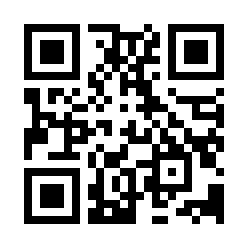

<font size=6> Link to this Notebook: https://bit.ly/3YXfpUU </font>


## Colab and Jupyter Notebooks

The tool we are using is called Colab, an environment to play with python notebooks directly in your web browser, made by Google. It is based on the famous Jupyter Notebook web interactive python shell, which you can install locally on your machine (e.g. through the conda package manager).

If you never used Colab or Jupyter Notebook before, you may want to take a look at the official [Colab guide](https://colab.research.google.com/notebooks/welcome.ipynb).



### Getting started with Colab

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- (Almost) Zero configuration required
- Access to GPUs free of charge
- Easy sharing

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells.
The code order does not depend on the order of cell in which it is defined, but on the order in which you execute them.

In [ ]:
#this will give an error if executed before the next two cells
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

176400

In [ ]:
seconds_in_an_hour = 60*60
seconds_in_an_hour

3600

In [ ]:
seconds_in_a_day = 7 * seconds_in_an_hour
seconds_in_a_day

25200

## PyTorch Basics

During the course we'll use and learn many parts of PyTorch API.
You should also familiarize with the [PyTorch Documentation](https://pytorch.org/docs/stable/) as it will greatly assist you.




### Introduction

Many Deep Learning frameworks have emerged for python. Arguably the most notable ones in 2023 are **PyTorch**, **TensorFlow** (with keras frontend) and **Jax**.
We will use PyTorch, which is [the leading DL framework](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/) for research and [continues to gain popularity](https://openai.com/blog/openai-pytorch/).

The fundamental data structure of these frameworks is the tensor, which is more or less the same everywhere. Gaining a solid understanding of how tensors work is required in deep learning and will definitely come in handy in other areas.

This tutorials will introduce you to tensors handling and operations between tensors.

In [ ]:
#In Colab pytorch is installed by default, have a look to www.pytorch.com if you want to install it on your system
import torch
torch.__version__

'2.0.1+cu118'

### **PyTorch Tensor**

The ``Tensor`` class is very similar to numpy's ``ndarray`` and provides most of its functionality.


However, it also has two important distinctions:

- Support for GPU computations.
- Each tensor may store extra information needed to perform back propagation:
  - The gradient tensor w.r.t. some variable (e.g. the loss)
  - A node representing an operation in the computational graph that produced this tensor.


Keep in mind:

- Usually **tensor operations are not in-place**

##### Create a tensor

In [ ]:
# Basic tensor creation from python lists
z = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int32)
print(z.shape)
print(z.dtype)
z

torch.Size([2, 3])
torch.int32


tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [ ]:
# Some other tensor construction methods
# Tensors may have an arbitrary number of dimensions (tensor rank)
z = torch.zeros((3,5,2))
print(z.shape)
print(z.dtype)
z

torch.Size([3, 5, 2])
torch.float32


tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

#### Operations between tensors

In [ ]:
a = torch.arange(24).reshape(4, 3, 2)
b = torch.rand(6).reshape(3,2)*0.1
display(a.shape)
display(b.shape)

#broadcasting: pytorch will try to match the dimensions of the two shapes by replicating data alogn dimensions of size 1
c=a+b

print(c.shape)
c

torch.Size([4, 3, 2])

torch.Size([3, 2])

torch.Size([4, 3, 2])


tensor([[[ 0.0438,  1.0873],
         [ 2.0042,  3.0560],
         [ 4.0634,  5.0796]],

        [[ 6.0438,  7.0873],
         [ 8.0042,  9.0560],
         [10.0634, 11.0796]],

        [[12.0438, 13.0873],
         [14.0042, 15.0560],
         [16.0634, 17.0796]],

        [[18.0438, 19.0873],
         [20.0042, 21.0560],
         [22.0634, 23.0796]]])

In [ ]:
a = torch.arange(24).reshape(2, 3, 4).float() #casting to float32
b = torch.randn(2,1,4)

c = torch.randn(2, 4, 3)

display( (a*b).shape ) #elemntwise operation
display( (a@c).shape ) #matrix multiplication on the last two deimensions

torch.Size([2, 3, 4])

torch.Size([2, 3, 3])

In [ ]:
#you can aggregate along specific dimensions
display(a.sum(-1))
torch.sum(a,dim=0)

tensor([[ 6., 22., 38.],
        [54., 70., 86.]])

tensor([[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]])

###### 📖 Mastering broadcasting is hard.


However, it is very useful to write **vectorized** code, i.e. code that avoids explicit python loops which are slow and can not be efficiently parallelized.

Instead, this approach takes advantage of the underlying C implementation of PyTorch and Numpy (on CPU) or CUDA implementation of Pytorch (on GPU).

![broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

##### Exercize
>
> Given two vectors $X \in R^n$ and $Y \in R^m$ compute the differences between all possible pairs of numbers, and organize those differences in a matrix $Z \in R^{n \times m}$:
> $$ z_{ij} = x_i - y_j $$

In [ ]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5])

(x[None,:]-y[:,None])
# y[:,None].shape
# ✏️ your code here

tensor([[-3, -2, -1],
        [-4, -3, -2]])

#### It is possible to easily convert to/from Numpy tensors:

In [ ]:
t = torch.rand((3, 3), dtype=torch.float32)
t.numpy()

array([[0.30680448, 0.8388882 , 0.24439543],
       [0.40237576, 0.12493682, 0.9361805 ],
       [0.7080693 , 0.25043416, 0.29882312]], dtype=float32)

In [ ]:
import numpy as np
n = np.random.rand(3,3).astype(np.float16)
torch.from_numpy(n)

tensor([[0.1039, 0.4114, 0.8882],
        [0.1620, 0.3750, 0.3352],
        [0.9092, 0.2212, 0.4077]], dtype=torch.float16)

#### Tensor indexing

In [ ]:
a = torch.arange(50).reshape(10, 5)

print(a[0])  # first row
print(a[1])  # second row
print(a[-1])  # last row
print(a[:,-2])  # second last column

tensor([0, 1, 2, 3, 4])
tensor([5, 6, 7, 8, 9])
tensor([45, 46, 47, 48, 49])
tensor([ 3,  8, 13, 18, 23, 28, 33, 38, 43, 48])


In [ ]:
#slicing
print(a[5:8])
print(a[:,-2:])

print(a[:,-2:,None].shape) # "None" adds an empty dimension. May be useful for broadcasting

tensor([[25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]])
tensor([[ 3,  4],
        [ 8,  9],
        [13, 14],
        [18, 19],
        [23, 24],
        [28, 29],
        [33, 34],
        [38, 39],
        [43, 44],
        [48, 49]])
torch.Size([10, 2, 1])


In [ ]:
#boolean indexing
print(a[a>25])
print(a[a[:,0]>30,:])

tensor([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49])
tensor([[35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49]])


#### Using the GPU

With Colab you can choose different types of executions (kernels). Ensure you selected one with GPU capabilities.

In [ ]:
# Check if the GPU is available
torch.cuda.is_available()

True

In [ ]:
# If available use the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
t = torch.rand((3,3))
t = t.to(device)  # Pay attention to re-assign the variable!
t

tensor([[0.8092, 0.0324, 0.2026],
        [0.2752, 0.6892, 0.7211],
        [0.2562, 0.9468, 0.8231]], device='cuda:0')

In [ ]:
# Construct tensors directly on the GPU memory
t = torch.ones((5, 5), device='cuda')
t

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')

In [ ]:
t = torch.rand((3,3))

# Other methods to transfer tensors between devices

# Be careful of hardcoded cuda calls: the code will not run if a GPU is not available
t = t.cuda()
t

tensor([[0.4902, 0.3026, 0.5660],
        [0.5570, 0.9328, 0.5681],
        [0.7503, 0.1866, 0.2269]], device='cuda:0')

In [ ]:
t = t.cpu()
t

tensor([[0.4902, 0.3026, 0.5660],
        [0.5570, 0.9328, 0.5681],
        [0.7503, 0.1866, 0.2269]])

In [ ]:
import time
#compar the execution time

x = torch.randn([10000,3])
y = torch.randn([20000,3])

x_gpu = x.cuda()
y_gpu = y.cuda()

t = time.time()
((x[:,None,:]-y[None,:,:])**2).sum(-1)
print("Elapsed s: ", time.time()-t)

t = time.time()
((x_gpu[:,None,:]-y_gpu[None,:,:])**2).sum(-1)
print("Elapsed s: ", time.time()-t)

Elapsed s:  6.045674562454224
Elapsed s:  0.001463174819946289


## The Pytorch NN training pipeline

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reproducibility stuff
import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(0)

torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True  # Note that this Deterministic mode can have a performance impact
torch.backends.cudnn.benchmark = False


PyTorch provides the elegantly designed modules and classes
[`torch.nn`](https://pytorch.org/docs/stable/nn.html),
[`torch.optim`](https://pytorch.org/docs/stable/optim.html),
[`Dataset`](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset),
and [`DataLoader`](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader)
to help you create and train neural networks.


---

A general pipeline suitable for most problems and models with minors tweaks comprises these steps:

```python
# load data
# create model
# create optimizer

# for each epoch
  # train the model on the training set
  # evaluate the model on one or more evaluation sets
  # log metrics (e.g. log, accuracy)
```

### PyTorch Dataset

In PyTorch (and other common frameworks) you can decouple the code that manages the data and the code that uses the data.
This produces simpler and more understandable code, and enables to re-use the same dataset with different models or the same model with different datasets.

In the following sections, we will have a glimpse into how to manage the data pipeline.

[`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset) is an abstract class representing a dataset. Your custom dataset should inherit `Dataset` and override the following methods:

- `__len__`: so that `len(dataset)` returns the size of the dataset
- `__getitem__`: so that `dataset[i]` returns the $i$-th sample from the dataset.

Let's create a toy dataset by randomly sampling noisy observations pairs $(x_i,y_i)$:
\begin{align*}
&x_i \sim U([-1, 1])\\
&\nu_i \sim \mathcal{N}(0,1)\\
&y_i = x_i^3 + \nu_i
\end{align*}:

In [ ]:
from torch.utils.data import Dataset

class ToyDataset(Dataset):

  def __init__(self, n_points: int = 20, noise: float = .1):
    super().__init__()  # In python 3 this is enough

    self.n_points = n_points
    self.x = torch.rand((n_points,1))*2-1
    self.y = self.x ** 3 + noise * torch.randn(n_points,1)

  def __len__(self):
    return self.n_points

  def __getitem__(self, idx):
    return {
        'x': self.x[idx],
        'y': self.y[idx]
    }

toydataset = ToyDataset(200, noise=.1)
toydataset

In this case the dataset is composed of simple pairs of points:

In [ ]:
toydataset[2]

{'x': tensor([-0.2343]), 'y': tensor([0.0816])}

In [ ]:
import plotly.express as px
fig = px.scatter(x=toydataset.x[:,0].numpy(), y=toydataset.y[:,0].numpy())
fig.show()

##### Pre-defined datasets
The torch-vision implements and can automatically retrieve the data of many "standard" datasets


In [ ]:
import torchvision
imagenet_data = torchvision.datasets.MNIST('path/to/imagenet_root/',download=True )
imagenet_data

### PyTorch DataLoader


[`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) is an iterator which provides:

- Data batching
- Data shuffling
- Parallel data loading using `multiprocessing` workers. Meaning that while the `GPU` is performing some computation on a batch, in parallel you can load the next batch.


Creating a dataloader from a dataset is straightforward, this is one example that highlights some of the most used parameters:

In [ ]:
from torch.utils.data import DataLoader

toydataset = ToyDataset(200)
toyloader = DataLoader(toydataset,
                       batch_size=8,    # number of elements in each batch
                       shuffle=True,    # shuffle the dataset
                       num_workers=4   # number of workers, i.e. batches to prefetch
                       )



# extract a batch
data = next(iter(toyloader))
data

{'x': tensor([[ 0.0063],
         [-0.2508],
         [ 0.4039],
         [ 0.4128],
         [-0.3152],
         [-0.7759],
         [ 0.9337],
         [-0.1681]]),
 'y': tensor([[-0.1338],
         [ 0.0571],
         [ 0.0225],
         [ 0.2114],
         [-0.2080],
         [-0.4104],
         [ 0.8284],
         [-0.0836]])}

### Model definition and training

Pytorch provides the modules ``nn.Module`` and ``nn.Parameter`` for defining your model and training parameters.

We subclass ``nn.Module`` (which itself is a class and
able to keep track of state).  We create a class that
holds our weights, bias, and method for the forward step.  ``nn.Module`` has a
number of attributes and methods (such as ``.parameters()`` and ``.zero_grad()``)
useful during the training phase.


In [ ]:
from torch import nn

class Linear(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(input_size, output_size)) #initialization
    self.bias = nn.Parameter(torch.zeros(output_size))

  def forward(self, xb):
    return xb @ self.weights + self.bias

Since we're now using an object instead of just using a function, we
first have to instantiate our model:



In [ ]:
model = Linear(1,1)
model

Linear()

In [ ]:
model.bias

Parameter containing:
tensor([0.], requires_grad=True)

In [ ]:
data = next(iter(toyloader))
model(data['x'])

tensor([[-0.6728],
        [-0.8787],
        [ 0.8453],
        [-1.8368],
        [ 0.6164],
        [-1.7459],
        [-0.1788],
        [-0.9018]], grad_fn=<AddBackward0>)

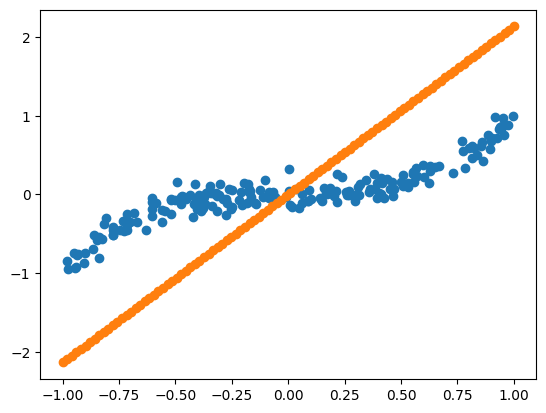

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=toydataset.x[:,0].numpy(), y=toydataset.y[:,0].numpy())

x_test = torch.linspace(-1,1,100)

model.eval() #we put the model on evaluation and disable gradient computation
with torch.no_grad():
  y_pred = model(x_test[:,None])
  plt.scatter(x=x_test.cpu().numpy(), y=y_pred[:,0].cpu().numpy())
plt.show()


Now we can define and calculate the loss to be minimized during our training. Note that
``nn.Module`` objects are used as if they are functions (i.e they are
*callable*), but behind the scenes Pytorch will call our ``forward``
method automatically.

> The `__call__` method of the Modules, internally calls the `forward` method and *does other stuff* (e.g. registers some hooks, you can check the implementation [here](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module)). Thus, you should always call the forward with `model(inputs)` and never directly the forward `model.forward(inputs)`.

In [ ]:
def loss_func(real_y, pred_y):
  return ((pred_y-real_y)**2).mean()

data = next(iter(toyloader))
print(loss_func(model(data['x']), data['y']))

tensor(1.0383, grad_fn=<MeanBackward0>)


We can take advantage of `model.parameters()` and `model.zero_grad()` (which are both defined by PyTorch for ``nn.Module``) to optimize the parameters of our model by implementing a simple gradient descent scheme.

```python
  with torch.no_grad():
      for p in model.parameters(): p -= p.grad * lr
      model.zero_grad()
```

In [ ]:
#REMEMBER: to use GPU computation you need to move both your model and data to the cuda device
device = 'cuda'
model.to(device)

#training loop
epochs=20
lr=1e-2
for epoch in range(epochs):
  total_loss = 0
  for data in toyloader:
    xb = data['x'].to(device) # <- move to device
    yb = data['y'].to(device) # <- move to device
    pred = model(xb)
    loss = loss_func(pred, yb)
    total_loss += loss.item() # detach from gradient computation

    loss.backward() # compute the gradient of the model parameters w.r.t. the loss function
    with torch.no_grad():
      for p in model.parameters():
        p -= p.grad * lr
      model.zero_grad()

  print(total_loss/len(toyloader.dataset))


0.08277313515543938
0.061876220256090166
0.0465359178930521
0.03527954675257206
0.026994042024016382
0.02090007685124874
0.016435241885483266
0.013104401268064976
0.010658051744103432
0.008845603112131357
0.007523007374256849
0.006542464345693588
0.005813729790970683
0.005290271891281009
0.004891936392523348
0.004604044295847416
0.0043872350035235284
0.004231886612251401
0.004112901925109327
0.0040272192424163225


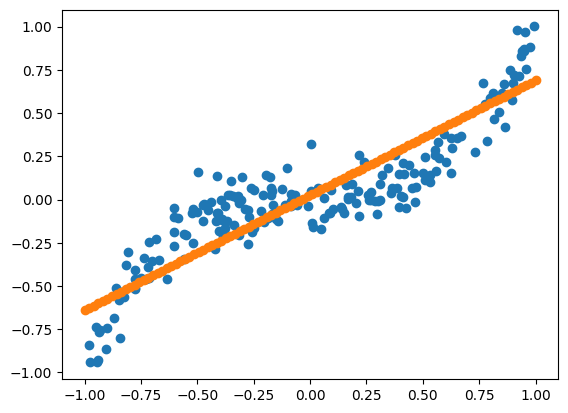

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=toydataset.x[:,0].numpy(), y=toydataset.y[:,0].numpy())

x_test = torch.linspace(-1,1,100).to(device)

model.eval() #we put the model on evaluation and disable gradient computation
with torch.no_grad():
  y_pred = model(x_test[:,None])
  plt.scatter(x=x_test.cpu().numpy(), y=y_pred[:,0].cpu().numpy())
plt.show()


### The torch.nn module and torch.optim

``torch.nn`` already defines basic NN layers and simple NN structures:
- ``nn.Linear`` defines a linear layer
- ``nn.ReLU``   defines a layer that implements the ReLU operator
- ``nn.Sequential`` object runs each of the modules contained within it, in a sequential manner. This is a simpler way of writing our neural network.


In [ ]:
model = nn.Sequential(
  nn.Linear(1, 8),
  nn.ReLU(),
  nn.Linear(8, 8),
  nn.ReLU(),
  nn.Linear(8, 1))

model

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

``torch.optim`` defines some advanced optimizers, as the ADAM optimizer with first and second order momentum. Once instantiated and attached to the model parameters, we can use the step method to take a forward step, instead of manually updating each parameter.


In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
for epoch in range(epochs):
  total_loss = 0
  for data in toyloader:
    xb = data['x']
    yb = data['y']
    pred = model(xb)
    loss = loss_func(pred, yb)
    total_loss += loss.item() # detach from gradient computation

    loss.backward() # compute the gradient of the model parameters w.r.t. the loss function
    opt.step() #<----------
    opt.zero_grad()

  print(total_loss/len(toyloader.dataset))

0.023996607568114996
0.010636822255328297
0.004642212307080626
0.0036584886536002157
0.002402118230238557
0.002087303807493299
0.0019227536348626019
0.0015707014850340783
0.0018459809059277177
0.0016842581355012954
0.0014178828429430724
0.0014085977233480663
0.0014846916811075061
0.0018650558940134943
0.0015616629377473146
0.0017256125714629888
0.001697177531896159
0.0015493814693763853
0.0017456222977489232
0.0014823735831305384


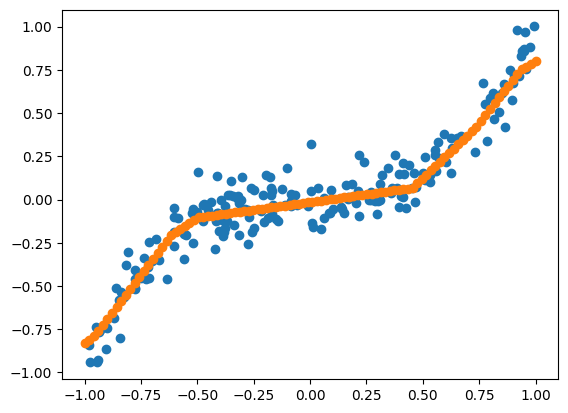

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=toydataset.x[:,0].numpy(), y=toydataset.y[:,0].numpy())

x_test = torch.linspace(-1,1,100)

model.eval() #we put the model on evaluation and disable gradient computation
with torch.no_grad():
  y_pred = model(x_test[:,None])
  plt.scatter(x=x_test.numpy(), y=y_pred[:,0].numpy())
plt.show()
